# Handwritten Digit Classification with CNNs

In [16]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [4]:
# Load the MNIST Dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


In [5]:
# Normalize pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# Reshape the data to add a channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

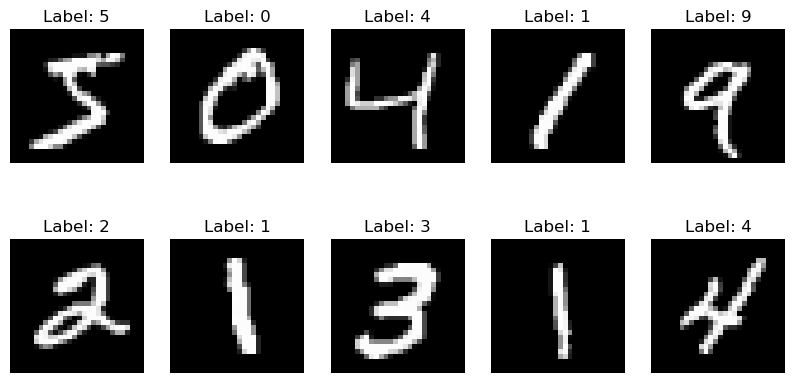

In [7]:
#Visualize Sample Images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].squeeze(), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [8]:
#Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes (digits 0-9)
])

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Display the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [11]:
#Train the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)


Epoch 1/10
938/938 [==============================] - 37s 35ms/step - loss: 0.2888 - accuracy: 0.9095 - val_loss: 0.0598 - val_accuracy: 0.9815
Epoch 2/10
938/938 [==============================] - 34s 36ms/step - loss: 0.1064 - accuracy: 0.9680 - val_loss: 0.0422 - val_accuracy: 0.9866
Epoch 3/10
938/938 [==============================] - 34s 37ms/step - loss: 0.0805 - accuracy: 0.9759 - val_loss: 0.0347 - val_accuracy: 0.9878
Epoch 4/10
938/938 [==============================] - 34s 36ms/step - loss: 0.0660 - accuracy: 0.9800 - val_loss: 0.0311 - val_accuracy: 0.9880
Epoch 5/10
938/938 [==============================] - 34s 36ms/step - loss: 0.0577 - accuracy: 0.9819 - val_loss: 0.0274 - val_accuracy: 0.9901
Epoch 6/10
938/938 [==============================] - 36s 38ms/step - loss: 0.0506 - accuracy: 0.9844 - val_loss: 0.0272 - val_accuracy: 0.9915
Epoch 7/10
938/938 [==============================] - 40s 43ms/step - loss: 0.0468 - accuracy: 0.9850 - val_loss: 0.0259 - val_accuracy:

In [12]:
#Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 4s 12ms/step - loss: 0.0242 - accuracy: 0.9922
Test Accuracy: 99.22%


In [13]:
#Visualize Training Results
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

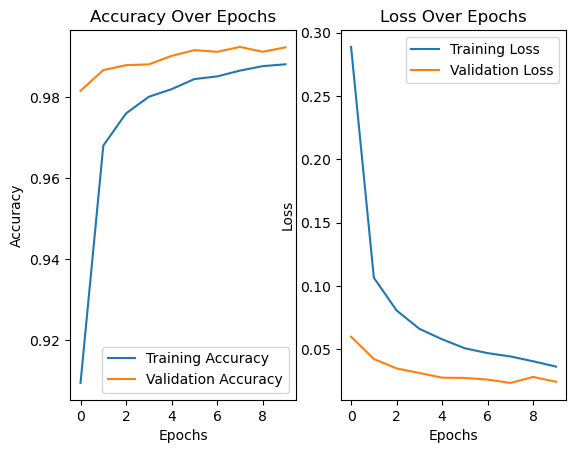

In [15]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [17]:
# Path to custom handwritten digit image
custom_image_path = r"C:\Users\swaro\30 day challenge\Day13\test image.jpg"

In [18]:
# Load and preprocess the image
custom_image = cv2.imread(custom_image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
custom_image = cv2.resize(custom_image, (28, 28))  # Resize to 28x28 pixels
custom_image_normalized = custom_image / 255.0  # Normalize pixel values to [0, 1]
custom_image_reshaped = custom_image_normalized.reshape(1, 28, 28, 1)  # Add batch and channel dimensions

In [19]:
#  Predict the digit
predictions = model.predict(custom_image_reshaped)
predicted_class = np.argmax(predictions)

1/1 [==============================] - 0s 137ms/step


In [20]:
# Display the result
print(f"Predicted Digit: {predicted_class}")

Predicted Digit: 5


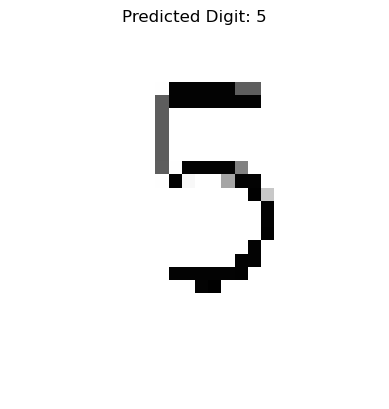

In [21]:
# Display the custom image
plt.imshow(custom_image, cmap='gray')
plt.title(f"Predicted Digit: {predicted_class}")
plt.axis('off')
plt.show()